In [153]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [154]:
out_dir = os.path.join(os.getcwd(), "../../out/k-means")

In [170]:
np.random.seed(42)

# generate some random data
NPOINTS = 50

uA = -1.5
x1A = np.array([
    np.random.randn(NPOINTS) + -2,
    np.random.randn(NPOINTS) * 1 + -2,
]).T

x1B = np.array([
    np.random.randn(NPOINTS) + 2,
    np.random.randn(NPOINTS) * 1 + 2,
]).T

X = np.vstack([x1A, x1B])

print(X.shape)
labels = np.hstack([np.zeros(x1A.shape[0]), np.ones(x1B.shape[0])])
labels = labels.astype(bool)
print(labels.shape)

(100, 2)
(100,)


In [174]:
def plot_data(X, clusters, c0, c1):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    _ = axes[0].scatter(X[:,0], X[:,1], edgecolors='k', color='k')
    _ = axes[0].set_title('Not clustered (Start)')
    _ = axes[1].scatter(X[~clusters,0], X[~clusters,1], color=c0)
    _ = axes[1].scatter(X[clusters,0], X[clusters,1], color=c1)
    _ = axes[1].set_title('Clustered (Goal)')

In [175]:
colors = list(sns.color_palette("tab10"))

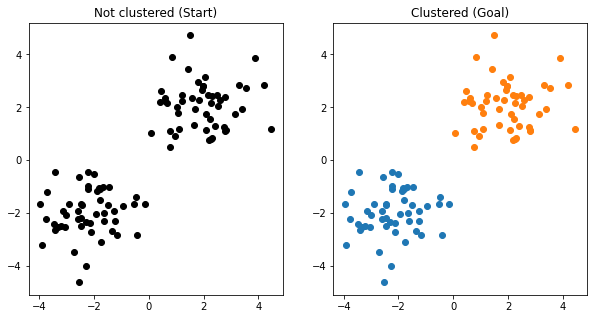

In [176]:
plot_data(X, labels, colors[0], colors[1])

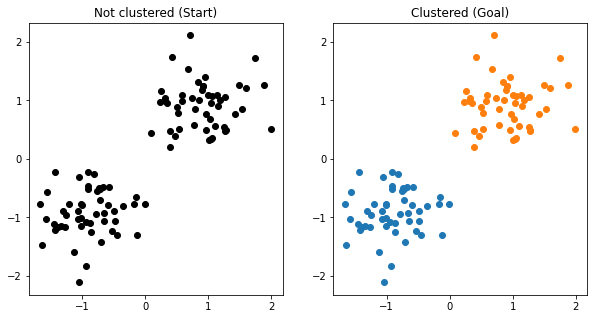

In [177]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

plot_data(X_std, labels, colors[0], colors[1])

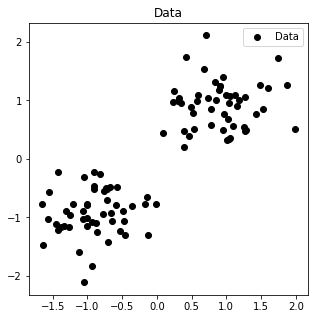

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
_ = ax.scatter(X_std[:,0], X_std[:,1], edgecolors='k', color='k')
_ = ax.set_title('Data')
_ = ax.legend(["Data"])
plt.savefig(os.path.join(out_dir, 'data.png'), facecolor='white', transparent=False)

In [179]:
model = KMeans(n_clusters=2)
model.fit(X_std)
cluster_center_colors = list(sns.color_palette("pastel"))

[-0.90803338 -0.91850976]
[0.90803338 0.91850976]


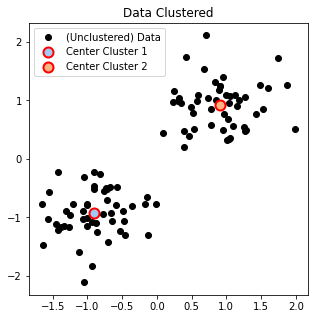

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
_ = ax.scatter(X_std[:,0], X_std[:,1], edgecolors='k', color='k')
_ = ax.set_title('Data Clustered')
for center, color in zip(model.cluster_centers_, cluster_center_colors):
    print(center)
    plt.scatter(x=center[0], y=center[1],color=color, edgecolors='red', s=100, linewidths=2)
_ = ax.legend(["(Unclustered) Data", "Center Cluster 1", "Center Cluster 2"])

plt.savefig(os.path.join(out_dir, 'data-clusters.png'), facecolor='white', transparent=False)

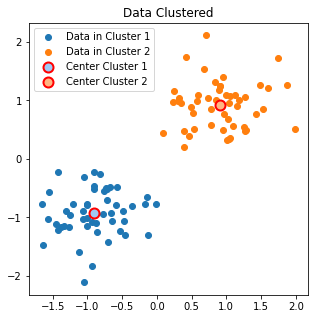

In [181]:
cluster_hat = model.predict(X_std).astype(bool)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
_ = ax.scatter(X_std[~cluster_hat,0], X_std[~cluster_hat,1], color=colors[0])
_ = ax.scatter(X_std[cluster_hat,0], X_std[cluster_hat,1], color=colors[1])
_ = ax.set_title('Data Clustered')
for center, color in zip(model.cluster_centers_, cluster_center_colors):
    plt.scatter(x=center[0], y=center[1],color=color, edgecolors='red', s=100, linewidths=2)
_ = ax.legend(["Data in Cluster 1", "Data in Cluster 2", "Center Cluster 1", "Center Cluster 2"])

plt.savefig(os.path.join(out_dir, 'data-clustered.png'), facecolor='white', transparent=False)

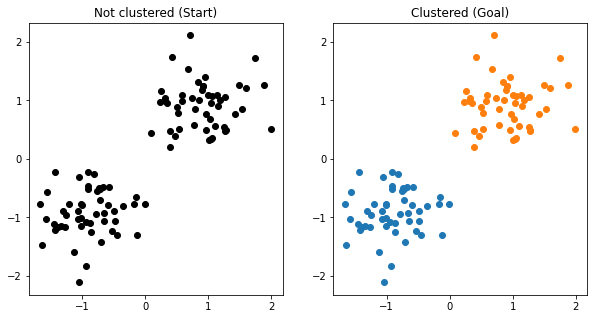

In [184]:
model = KMeans(n_clusters=2)

cluster_hat = model.fit_predict(X_std).astype(bool)
plot_data(X_std, cluster_hat, colors[0], colors[1])

In [185]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
y = y.astype(bool)

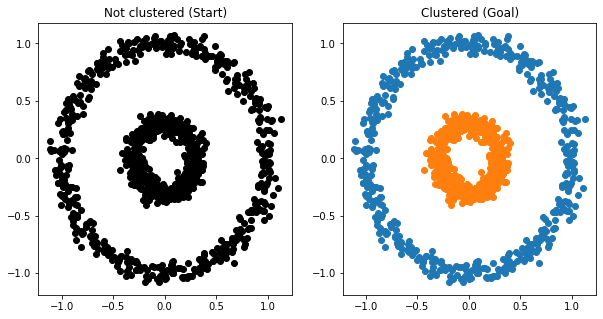

In [188]:
plot_data(X, y, colors[0], colors[1])
plt.savefig(os.path.join(out_dir, 'limit-1-solution.png'), facecolor='white', transparent=False)

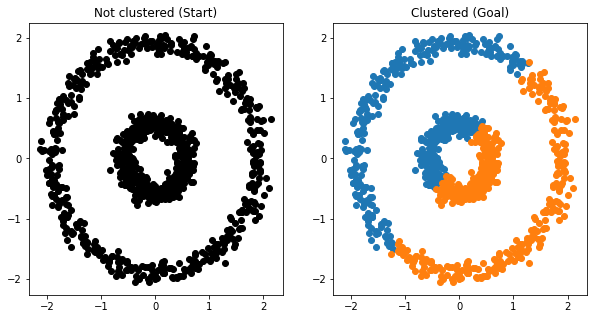

In [190]:
X_std = StandardScaler().fit_transform(X)
model = KMeans(n_clusters=2).fit(X_std)
y_hat = model.predict(X_std).astype(bool)

plot_data(X_std, y_hat, colors[0], colors[1])
plt.savefig(os.path.join(out_dir, 'limit-1.png'), facecolor='white', transparent=False)

In [205]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=[[5, 5], [-5, -5]], cluster_std=[[1, 1], [5, 5]], random_state=0)
y = y.astype(bool)

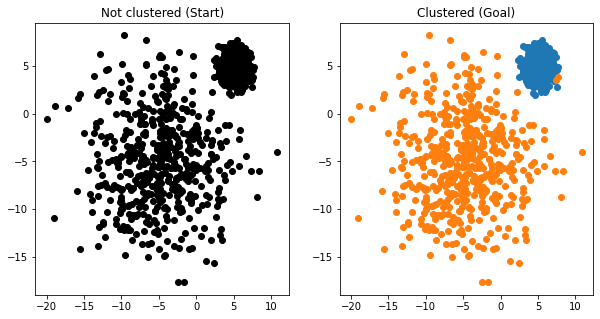

In [206]:
plot_data(X, y, colors[0], colors[1])

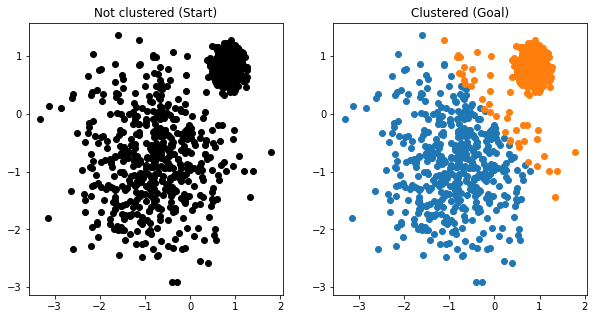

In [207]:
X_std = StandardScaler().fit_transform(X)
model = KMeans(n_clusters=2).fit(X_std)
y_hat = model.predict(X_std).astype(bool)

plot_data(X_std, y_hat, colors[0], colors[1])
plt.savefig(os.path.join(out_dir, 'limit-1.png'), facecolor='white', transparent=False)